<a href="https://colab.research.google.com/github/GOE84/Financial-Market-Analysis/blob/main/Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **โครงการวิเคราะห์ราคาหุ้น**

สมุดบันทึกนี้มีวัตถุประสงค์เพื่อดึงข้อมูลราคาหุ้นจาก Yahoo Finance, ทำความสะอาดข้อมูลเบื้องต้น, บันทึกข้อมูลลงในไฟล์ CSV และแสดงผลเป็นกราฟ


#### 1. **นำเข้าไลบรารีที่จำเป็น**

เซลล์นี้จะนำเข้าไลบรารี Python ที่เราจะใช้ตลอดทั้งโครงการ:
- `yfinance`: สำหรับดาวน์โหลดข้อมูลหุ้นจาก Yahoo Finance
- `pandas`: สำหรับจัดการและวิเคราะห์ข้อมูลในรูปแบบ DataFrame
- `matplotlib.pyplot`: สำหรับสร้างกราฟและแสดงผลข้อมูล
- `os`: สำหรับจัดการระบบไฟล์ เช่น การสร้างไดเรกทอรี


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import os

#### 2. **กำหนดพารามิเตอร์**

เซลล์นี้ใช้สำหรับกำหนดตัวแปรหลักๆ ที่จะใช้ในการดึงข้อมูลหุ้น รวมถึง:
- `TICKER`: สัญลักษณ์หุ้นที่ต้องการ (เช่น 'AAPL' สำหรับ Apple)
- `START_DATE`: วันที่เริ่มต้นสำหรับการดึงข้อมูล
- `END_DATE`: วันที่สิ้นสุดสำหรับการดึงข้อมูล
- `RAW_DATA_PATH`: ตำแหน่งและชื่อไฟล์ที่จะบันทึกข้อมูลดิบ


In [4]:
TICKER = 'AAPL'  # 'TSLA', 'BTC-USD', 'PTT.BK'
START_DATE = '2015-01-01'
END_DATE = '2024-01-01'
RAW_DATA_PATH = '../data/raw/stock_price.csv' # เซฟย้อนกลับไปที่โฟลเดอร์ data/raw

#### 3. **ดาวน์โหลดข้อมูลราคาหุ้น**

เซลล์นี้ใช้ไลบรารี `yfinance` เพื่อดึงข้อมูลราคาหุ้นของ `TICKER` ที่ระบุในช่วง `START_DATE` ถึง `END_DATE` ข้อมูลที่ได้จะถูกเก็บไว้ใน DataFrame ชื่อ `df`.


In [5]:
# 1. โหลดข้อมูลจาก Yahoo Finance
print(f"กำลังดึงข้อมูลหุ้น {TICKER}...")
df = yf.download(TICKER, start=START_DATE, end=END_DATE)

กำลังดึงข้อมูลหุ้น AAPL...


/tmp/ipython-input-1128716513.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start=START_DATE, end=END_DATE)
[*********************100%***********************]  1 of 1 completed


#### 4. **ตรวจสอบข้อมูลเบื้องต้น (5 แถวแรก)**

หลังจากดาวน์โหลดข้อมูลแล้ว เซลล์นี้จะแสดง 5 แถวแรกของ DataFrame `df` เพื่อให้เห็นโครงสร้างและหน้าตาของข้อมูลที่ดึงมาได้


In [6]:
# 2. ดูหน้าตาข้อมูล 5 แถวแรก
print("\n--- ตัวอย่างข้อมูล ---")
print(df.head())


--- ตัวอย่างข้อมูล ---
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.237555  24.705324  23.798604  24.694239  212818400
2015-01-05  23.554737  24.086797  23.368517  24.006988  257142000
2015-01-06  23.556957  23.816336  23.195599  23.619031  263188400
2015-01-07  23.887281  23.987042  23.654504  23.765350  160423600
2015-01-08  24.805079  24.862719  24.097882  24.215380  237458000


#### 5. **ตรวจสอบค่าที่หายไป (Missing Values)**

เซลล์นี้จะตรวจสอบว่ามีข้อมูลใดใน DataFrame ที่เป็นค่าว่าง (`NaN`) หรือไม่ โดยจะแสดงผลรวมของค่าว่างในแต่ละคอลัมน์ เพื่อให้เราทราบถึงคุณภาพของข้อมูล.


In [7]:
# 3. เช็คว่ามีข้อมูลหายไหม (Missing Values)
print("\n--- เช็คค่าว่าง ---")
print(df.isnull().sum())


--- เช็คค่าว่าง ---
Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


#### 6. **บันทึกข้อมูลลงไฟล์ CSV**

เซลล์นี้จะสร้างไดเรกทอรีที่จำเป็น (ถ้ายังไม่มี) และบันทึก DataFrame `df` ลงในไฟล์ CSV ตามที่ระบุใน `RAW_DATA_PATH` การบันทึกข้อมูลดิบช่วยให้สามารถนำกลับมาใช้ใหม่ได้โดยไม่ต้องดาวน์โหลดซ้ำ


In [8]:
# 4. บันทึกเป็นไฟล์ CSV เก็บไว้
os.makedirs(os.path.dirname(RAW_DATA_PATH), exist_ok=True)
df.to_csv(RAW_DATA_PATH)
print(f"\nบันทึกไฟล์เรียบร้อยที่: {RAW_DATA_PATH}")


บันทึกไฟล์เรียบร้อยที่: ../data/raw/stock_price.csv


#### 7. **พล็อตกราฟราคาปิดของหุ้น**

เซลล์สุดท้ายนี้จะสร้างกราฟเส้นแสดงราคาปิด (`Close` price) ของหุ้น `TICKER` ตลอดช่วงเวลาที่กำหนด `(START_DATE - END_DATE)` เพื่อให้เห็นแนวโน้มของราคาหุ้นได้อย่างชัดเจน.


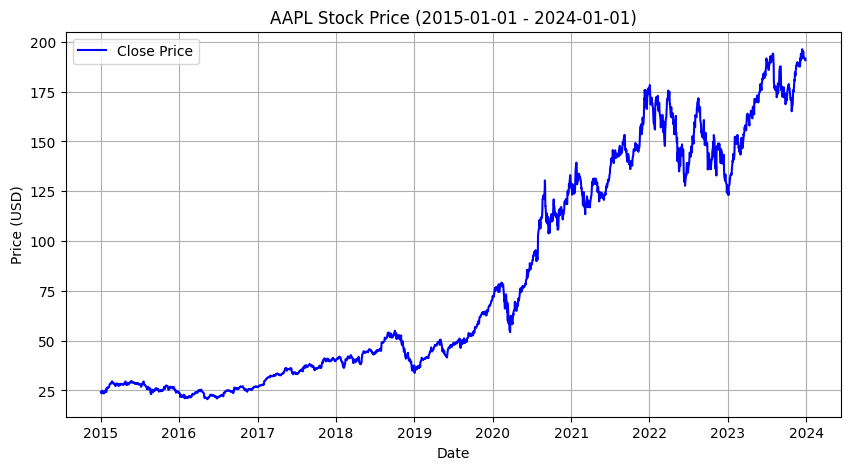

In [9]:
# 5. พล็อตกราฟราคาปิดดูทรง
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title(f'{TICKER} Stock Price ({START_DATE} - {END_DATE})')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

#### **--- Step 2: Feature Engineering ---**

ส่วนนี้จะทำการสร้างคุณลักษณะ (features) เพิ่มเติมจากข้อมูลราคาหุ้นที่มีอยู่ เพื่อใช้ในการวิเคราะห์และสร้างโมเดลในอนาคต


##### 1. **สร้าง Moving Average (เส้นค่าเฉลี่ยเคลื่อนที่)**

เซลล์นี้จะคำนวณเส้นค่าเฉลี่ยเคลื่อนที่ (Moving Average - MA) สำหรับราคาปิด โดยมี 2 ช่วงเวลาคือ 10 วัน (`MA_10`) และ 50 วัน (`MA_50`) เพื่อช่วยระบุแนวโน้มของราคาหุ้น โดยทั่วไป ถ้าเส้น MA สั้นตัดเส้น MA ยาวขึ้นไป มักจะบ่งบอกถึงแนวโน้มขาขึ้น


In [10]:
#  สร้าง Moving Average (เส้นค่าเฉลี่ย) เพื่อบอกเทรนด์
# ถ้าเส้นสั้น (10 วัน) ตัดเส้นยาว (50 วัน) ขึ้น แปลว่าขาขึ้น
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

##### 2. **สร้าง Daily Return (เปอร์เซ็นต์การเปลี่ยนแปลงรายวัน)**

เซลล์นี้จะคำนวณเปอร์เซ็นต์การเปลี่ยนแปลงของราคาปิดในแต่ละวัน (`Daily_Return`) เพื่อใช้วัดความผันผวน (Volatility) ของราคาหุ้น


In [11]:
#(เปอร์เซ็นต์การเปลี่ยนแปลงรายวัน)
# เพื่อดูความผันผวน
df['Daily_Return'] = df['Close'].pct_change()

##### 3. **สร้าง Lag Feature (ราคาของเมื่อวาน)**

เซลล์นี้จะสร้างคุณลักษณะ `Close_Lag1` ซึ่งเก็บค่าราคาปิดของวันก่อนหน้า (Lag 1) การมีข้อมูลราคาเมื่อวานเป็นสิ่งสำคัญในการทำนายราคาหุ้นในอนาคต


In [12]:
df['Close_Lag1'] = df['Close'].shift(1)

##### 4. **ลบข้อมูลที่มีค่าว่าง (NaN) ทิ้ง**

เนื่องจากการคำนวณ Moving Average และ Lag Feature จะทำให้เกิดค่าว่าง (NaN) ในช่วงเริ่มต้นของข้อมูล (เช่น 50 วันแรกสำหรับ `MA_50`) เซลล์นี้จะทำการลบแถวที่มีค่าว่างเหล่านี้ทิ้ง เพื่อให้ข้อมูลพร้อมสำหรับการวิเคราะห์ต่อไป


In [13]:
#  ลบข้อมูลที่เป็นช่องว่าง (NaN) ทิ้ง
# (เพราะ 50 วันแรกจะไม่มีค่า MA_50)
df.dropna(inplace=True)

##### 5. **แสดงตัวอย่างข้อมูลพร้อม Features ใหม่**

เซลล์นี้จะแสดง 5 แถวแรกของ DataFrame `df` หลังจากที่ได้สร้างคุณลักษณะใหม่ๆ เรียบร้อยแล้ว เพื่อให้เห็นว่าข้อมูลมีลักษณะอย่างไรหลังจากการประมวลผล


In [14]:
print("ปรุงข้อมูลเสร็จแล้ว! ตัวอย่าง 5 แถวแรกที่มี Features ใหม่:")
print(df[['Close', 'MA_10', 'MA_50', 'Daily_Return', 'Close_Lag1']].head())

ปรุงข้อมูลเสร็จแล้ว! ตัวอย่าง 5 แถวแรกที่มี Features ใหม่:
Price           Close      MA_10      MA_50 Daily_Return Close_Lag1
Ticker           AAPL                                              
Date                                                               
2015-03-16  27.809690  27.994206  26.586998     0.011004  27.507011
2015-03-17  28.274860  27.942571  26.667744     0.016727  27.809690
2015-03-18  28.593134  27.941013  26.768512     0.011256  28.274860
2015-03-19  28.377245  27.965273  26.864918    -0.007550  28.593134
2015-03-20  28.021137  27.949693  26.947595    -0.012549  28.377245


##### 6. **พล็อตกราฟราคาหุ้นพร้อม Moving Averages**

เซลล์นี้จะสร้างกราฟเพื่อแสดงราคาปิดของหุ้นพร้อมกับเส้นค่าเฉลี่ยเคลื่อนที่ 10 วัน และ 50 วัน เพื่อช่วยให้เห็นแนวโน้มของราคาหุ้นและจุดตัดของเส้นค่าเฉลี่ย ซึ่งสามารถใช้เป็นสัญญาณในการวิเคราะห์ได้


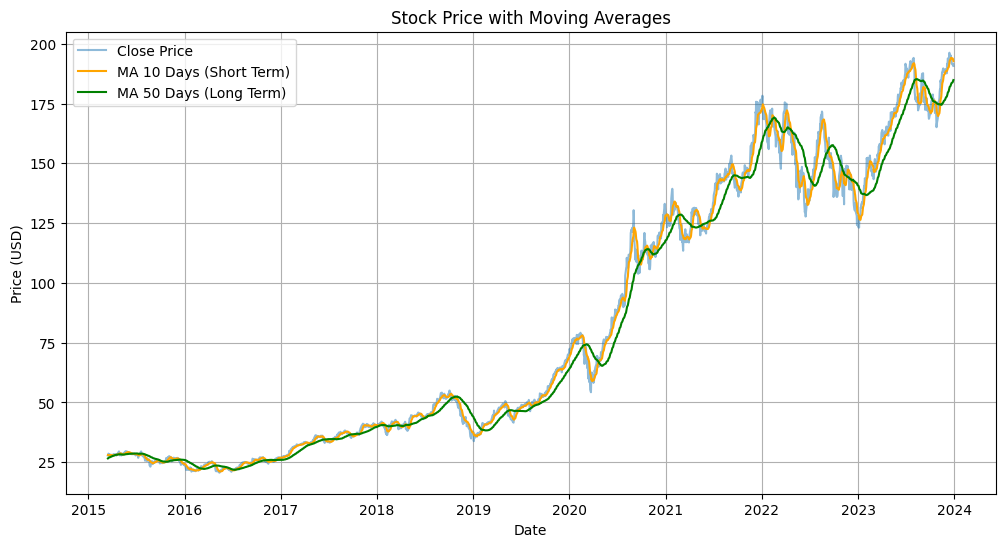

In [15]:
# --- พล็อตกราฟดูเทรนด์ ---
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.5)
plt.plot(df.index, df['MA_10'], label='MA 10 Days (Short Term)', color='orange')
plt.plot(df.index, df['MA_50'], label='MA 50 Days (Long Term)', color='green')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [17]:
# --- 1. สร้างโจทย์ให้ AI (Prepare Data) ---
# เราจะให้ AI ดูข้อมูล "วันนี้" (X) เพื่อทายราคา "พรุ่งนี้" (y)
# สร้างเฉลย: ขยับราคาปิดขึ้นมา 1 วัน (Prediction = ราคาของวันพรุ่งนี้)
df['Prediction'] = df['Close'].shift(-1)

In [18]:
# ลบแถวสุดท้ายทิ้ง (เพราะวันสุดท้ายไม่มีราคาของ "พรุ่งนี้" ให้ทาย)
df.dropna(inplace=True)

In [19]:
# กำหนดตัวแปร
# X = สิ่งที่ AI เห็น (ราคาปิดวันนี้, เส้น MA วันนี้, ราคาเมื่อวาน)
X = df[['Close', 'MA_10', 'MA_50', 'Daily_Return', 'Close_Lag1']]
# y = สิ่งที่ AI ต้องทาย (ราคาปิดพรุ่งนี้)
y = df['Prediction']

In [20]:
# --- 2. แบ่งข้อมูลสอบ (Train/Test Split) ---
# ห้ามสุ่มมั่ว (Random Split) เพราะหุ้นเป็นเรื่องของเวลา
# เราจะใช้ข้อมูล 80% แรกสอน และ 20% หลังเอาไว้สอบ
split_index = int(len(df) * 0.8) # จุดตัดที่ 80%

X_train = X[:split_index] # ข้อมูลสอน (อดีต)
y_train = y[:split_index] # เฉลยของข้อมูลสอน

X_test = X[split_index:]  # ข้อมูลสอบ (ปัจจุบัน-อนาคต)
y_test = y[split_index:]  # เฉลยเอาไว้ตรวจคะแนน

In [21]:
# --- 3. เริ่มสอน AI (Train Model) ---
print("🤖 กำลังฝึกสมอง AI... (อาจใช้เวลาสักครู่)")
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train) # สั่งให้เรียน

🤖 กำลังฝึกสมอง AI... (อาจใช้เวลาสักครู่)


RandomForestRegressor(random_state=42)

In [22]:
# --- 4. ลองสอบจริง (Prediction) ---
# ให้ AI ทายราคาของช่วง Test
predictions = model.predict(X_test)

In [23]:
# คำนวณความแม่นยำ (RMSE - ยิ่งน้อยยิ่งดี)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"✅ ฝึกเสร็จแล้ว! ค่าความคลาดเคลื่อนเฉลี่ย (RMSE): {rmse:.2f} USD")

✅ ฝึกเสร็จแล้ว! ค่าความคลาดเคลื่อนเฉลี่ย (RMSE): 8.04 USD


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3593 (\N{THAI CHARACTER CHO CHING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3621 (\N{THAI CHARACTER LO LING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io

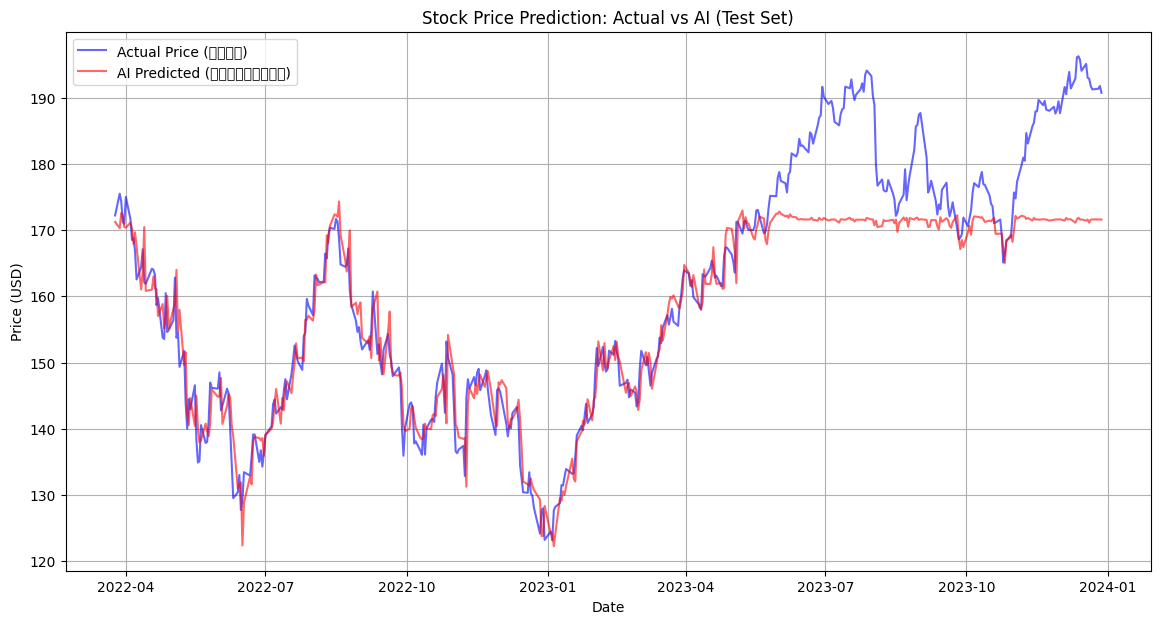

In [24]:
# --- 5. ตรวจผลงาน (Visualization) ---
# พล็อตเทียบ ราคาจริง vs ราคาที่ AI ทาย
plt.figure(figsize=(14, 7))
plt.plot(df.index[split_index:], y_test, label='Actual Price (เฉลย)', color='blue', alpha=0.6)
plt.plot(df.index[split_index:], predictions, label='AI Predicted (ที่ทายได้)', color='red', alpha=0.6)
plt.title(f'Stock Price Prediction: Actual vs AI (Test Set)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

📥 กำลังดึงข้อมูล AAPL...


/tmp/ipython-input-4238346285.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2020-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


✅ ได้ข้อมูลมาทั้งหมด 1006 วัน
🧹 ข้อมูลหลังทำความสะอาดเหลือ: 956 วัน
🤖 กำลังฝึกสมอง AI (Linear Regression)...
🎯 ฝึกเสร็จแล้ว! ความคลาดเคลื่อน (RMSE): 2.12 USD


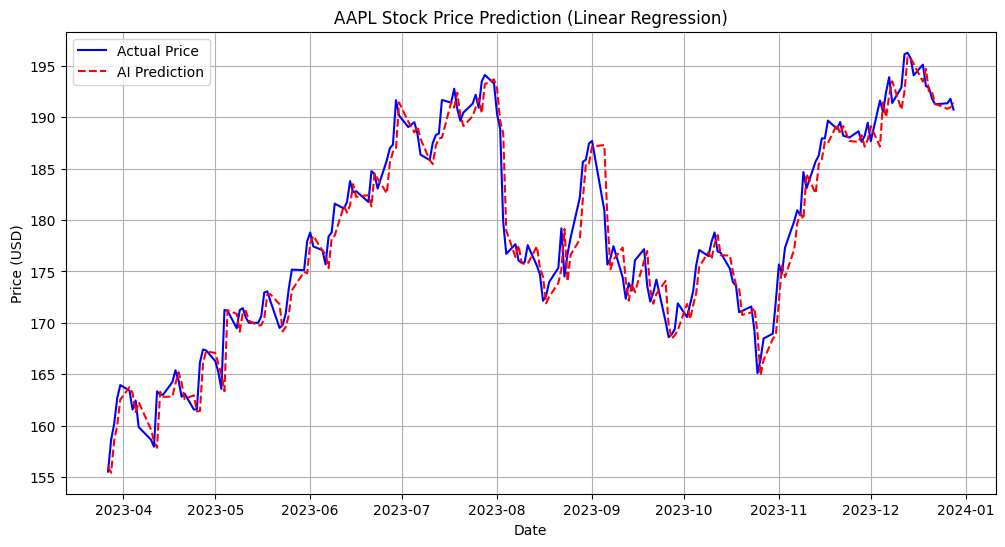

In [25]:
# --- รวมทุกขั้นตอนไว้ในที่เดียว เพื่อป้องกันข้อมูลหาย ---
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. ดึงข้อมูลใหม่ (Data Collection)
ticker = 'AAPL'
print(f"📥 กำลังดึงข้อมูล {ticker}...")
df = yf.download(ticker, start='2020-01-01', end='2024-01-01')

if len(df) == 0:
    print("❌ Error: ไม่พบข้อมูลหุ้น กรุณาเช็คชื่อหุ้นหรืออินเทอร์เน็ต")
else:
    print(f"✅ ได้ข้อมูลมาทั้งหมด {len(df)} วัน")

    # 2. ปรุงข้อมูล (Feature Engineering)
    # สร้างเส้นค่าเฉลี่ยและ Lag Feature
    df['MA_10'] = df['Close'].rolling(window=10).mean()
    df['MA_50'] = df['Close'].rolling(window=50).mean()
    df['Daily_Return'] = df['Close'].pct_change()
    df['Close_Lag1'] = df['Close'].shift(1)

    # สร้างเฉลย (Prediction) คือราคาปิดของวันพรุ่งนี้
    df['Prediction'] = df['Close'].shift(-1)

    # 3. ลบค่าว่าง (Cleaning)
    # ลบแถวที่มี NaN (ช่วงแรกที่ไม่มี MA และวันสุดท้ายที่ไม่มีเฉลย)
    df_clean = df.dropna()

    print(f"🧹 ข้อมูลหลังทำความสะอาดเหลือ: {len(df_clean)} วัน")

    if len(df_clean) > 0:
        # 4. แบ่งข้อมูลสอน/สอบ (Split Data)
        X = df_clean[['Close', 'MA_10', 'MA_50', 'Daily_Return', 'Close_Lag1']]
        y = df_clean['Prediction']

        split = int(len(df_clean) * 0.8)
        X_train, X_test = X[:split], X[split:]
        y_train, y_test = y[:split], y[split:]

        # 5. สอน AI (Training)
        print("🤖 กำลังฝึกสมอง AI (Linear Regression)...")
        model = LinearRegression()
        model.fit(X_train, y_train)

        # 6. วัดผล (Evaluation)
        predictions = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        print(f"🎯 ฝึกเสร็จแล้ว! ความคลาดเคลื่อน (RMSE): {rmse:.2f} USD")

        # 7. วาดกราฟโชว์ (Visualization)
        plt.figure(figsize=(12, 6))
        plt.plot(df_clean.index[split:], y_test, label='Actual Price', color='blue')
        plt.plot(df_clean.index[split:], predictions, label='AI Prediction', color='red', linestyle='--')
        plt.title(f'{ticker} Stock Price Prediction (Linear Regression)')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend()
        plt.grid(True)
        plt.show()

    else:
        print("⚠️ ข้อมูลไม่เพียงพอสำหรับการเทรน (โดนลบจนหมด)")


🚀 กำลังเริ่มวิเคราะห์: AAPL
🎯 RMSE (AAPL): 2.12


/tmp/ipython-input-1008492633.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2020-01-01', end='2024-01-01', progress=False)


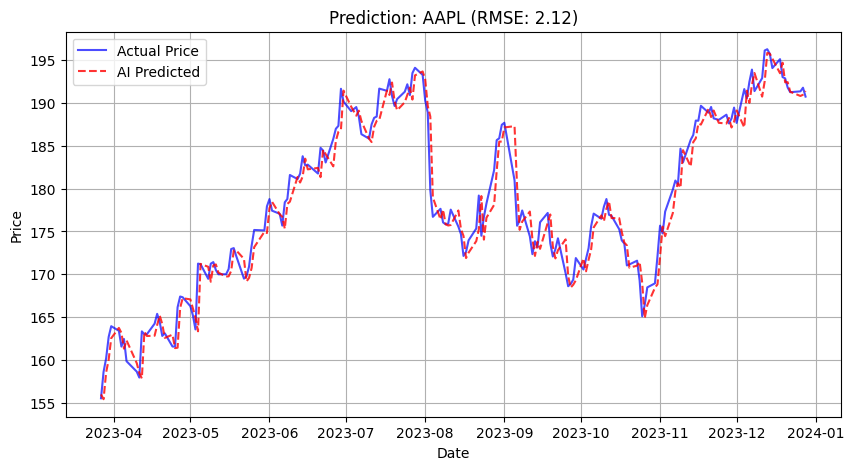


🚀 กำลังเริ่มวิเคราะห์: TSLA


/tmp/ipython-input-1008492633.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2020-01-01', end='2024-01-01', progress=False)


🎯 RMSE (TSLA): 7.05


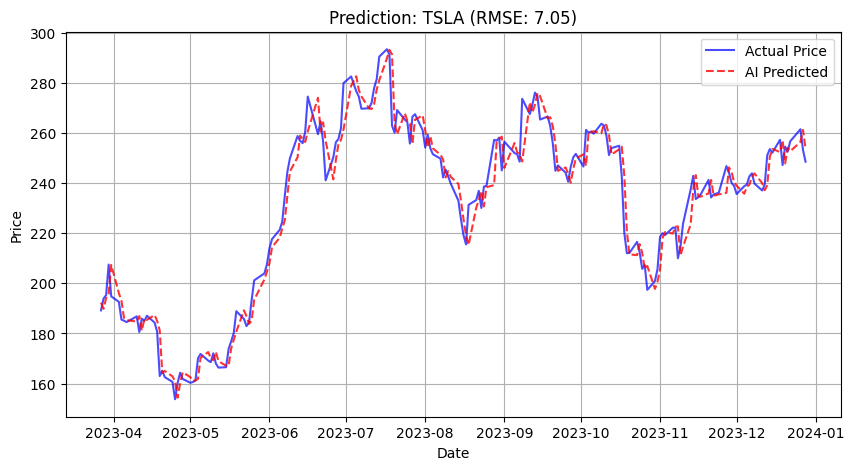


🚀 กำลังเริ่มวิเคราะห์: BTC-USD


/tmp/ipython-input-1008492633.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2020-01-01', end='2024-01-01', progress=False)


🎯 RMSE (BTC-USD): 643.92


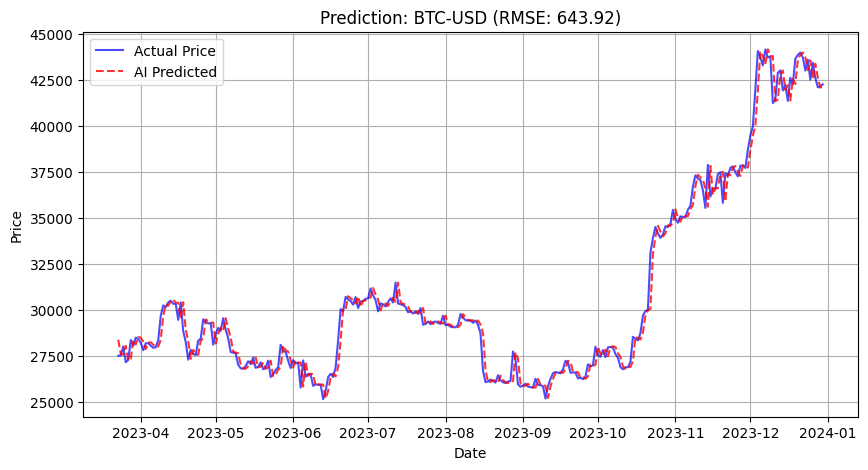


🚀 กำลังเริ่มวิเคราะห์: PTT.BK


/tmp/ipython-input-1008492633.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2020-01-01', end='2024-01-01', progress=False)


🎯 RMSE (PTT.BK): 0.32


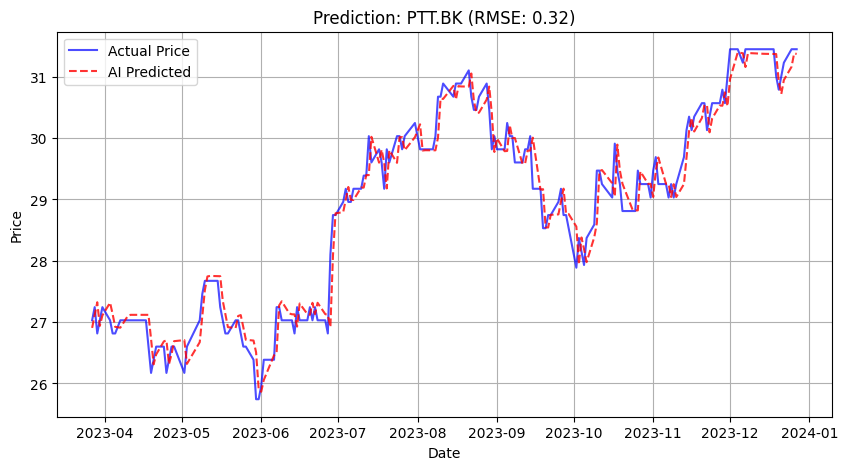

In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# --- กำหนดรายชื่อหุ้นที่อยากทำนาย (เพิ่มลดตรงนี้ได้เลย) ---
# AAPL = Apple, TSLA = Tesla, BTC-USD = Bitcoin, PTT.BK = ปตท. (หุ้นไทย)
tickers_list = ['AAPL', 'TSLA', 'BTC-USD', 'PTT.BK']

for ticker in tickers_list:
    print(f"\n{'='*40}")
    print(f"🚀 กำลังเริ่มวิเคราะห์: {ticker}")
    print(f"{'='*40}")

    # 1. ดึงข้อมูล
    df = yf.download(ticker, start='2020-01-01', end='2024-01-01', progress=False)

    if len(df) == 0:
        print(f"❌ ไม่พบข้อมูลสำหรับ {ticker}")
        continue

    # 2. ปรุงข้อมูล (Feature Engineering)
    # ใช้ .copy() เพื่อไม่ให้เตือน SettingWithCopyWarning
    df = df.copy()
    df['MA_10'] = df['Close'].rolling(window=10).mean()
    df['MA_50'] = df['Close'].rolling(window=50).mean()
    df['Daily_Return'] = df['Close'].pct_change()
    df['Close_Lag1'] = df['Close'].shift(1)
    df['Prediction'] = df['Close'].shift(-1) # เฉลย (ราคาพรุ่งนี้)

    # 3. ลบค่าว่าง
    df_clean = df.dropna()

    if len(df_clean) > 100: # เช็คว่าข้อมูลเยอะพอไหม
        # 4. แบ่งข้อมูล
        X = df_clean[['Close', 'MA_10', 'MA_50', 'Daily_Return', 'Close_Lag1']]
        y = df_clean['Prediction']

        split = int(len(df_clean) * 0.8)
        X_train, X_test = X[:split], X[split:]
        y_train, y_test = y[:split], y[split:]

        # 5. เทรนโมเดล
        model = LinearRegression()
        model.fit(X_train, y_train)

        # 6. วัดผล
        predictions = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        print(f"🎯 RMSE ({ticker}): {rmse:.2f}")

        # 7. พล็อตกราฟ (แยกทีละรูป)
        plt.figure(figsize=(10, 5))
        plt.plot(df_clean.index[split:], y_test, label='Actual Price', color='blue', alpha=0.7)
        plt.plot(df_clean.index[split:], predictions, label='AI Predicted', color='red', linestyle='--', alpha=0.8)
        plt.title(f'Prediction: {ticker} (RMSE: {rmse:.2f})')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show() # โชว์กราฟทันที ก่อนวนไปตัวถัดไป

    else:
        print(f"⚠️ ข้อมูล {ticker} น้อยเกินไป ข้ามไปตัวถัดไป")

# Task
Predict the price of gold (`GC=F`) from 2020-01-01 to 2024-01-01 by:
1. Downloading historical gold price data using `yfinance`.
2. Performing feature engineering to calculate 10-day and 50-day Moving Averages (`MA_10`, `MA_50`), Daily Return (`Daily_Return`), a 1-day lagged close price (`Close_Lag1`), and the next day's close price as the target (`Prediction`).
3. Cleaning the data by removing rows with missing values.
4. Splitting the data chronologically into training (80%) and testing (20%) sets.
5. Training a Linear Regression model on the training data.
6. Evaluating the model's performance on the test set using Root Mean Squared Error (RMSE).
7. Visualizing the actual vs. predicted gold prices on the test set.
8. Summarizing the model's performance and insights gained from the prediction.

## Define Gold Ticker and Parameters

### Subtask:
Set the `ticker` variable to the Yahoo Finance symbol for gold (e.g., 'GC=F') and define start and end dates for data collection.


**Reasoning**:
The subtask requires defining specific variables for the gold ticker, start date, and end date. A code block is needed to set these variables.



In [27]:
ticker = 'GC=F'
start = '2020-01-01'
end = '2024-01-01'
print(f"Gold Ticker: {ticker}, Start Date: {start}, End Date: {end}")

Gold Ticker: GC=F, Start Date: 2020-01-01, End Date: 2024-01-01


**Reasoning**:
The next step is to download the historical gold price data using `yfinance` as specified by the overall task, utilizing the previously defined `ticker`, `start`, and `end` variables.



In [28]:
print(f"\n📥 Downloading historical gold price data for {ticker} from {start} to {end}...")
df = yf.download(ticker, start=start, end=end)

if len(df) == 0:
    print(f"❌ Error: No data found for {ticker}. Please check the ticker symbol or your internet connection.")
else:
    print(f"✅ Successfully downloaded {len(df)} days of data for {ticker}.")
    print("\n--- First 5 rows of the downloaded data ---")
    print(df.head())


📥 Downloading historical gold price data for GC=F from 2020-01-01 to 2024-01-01...


/tmp/ipython-input-1079922416.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

✅ Successfully downloaded 1006 days of data for GC=F.

--- First 5 rows of the downloaded data ---
Price             Close         High          Low         Open Volume
Ticker             GC=F         GC=F         GC=F         GC=F   GC=F
Date                                                                 
2020-01-02  1524.500000  1528.699951  1518.000000  1518.099976    214
2020-01-03  1549.199951  1552.699951  1530.099976  1530.099976    107
2020-01-06  1566.199951  1580.000000  1560.400024  1580.000000    416
2020-01-07  1571.800049  1576.300049  1558.300049  1558.300049     47
2020-01-08  1557.400024  1604.199951  1552.300049  1579.699951    236


**Reasoning**:
The next step is to perform feature engineering as specified in the task, which includes calculating Moving Averages, Daily Return, Lagged Close Price, and the Prediction target. It's good practice to use `.copy()` to avoid potential `SettingWithCopyWarning` when adding new columns.



In [29]:
df = df.copy()
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['Daily_Return'] = df['Close'].pct_change()
df['Close_Lag1'] = df['Close'].shift(1)
df['Prediction'] = df['Close'].shift(-1)

print("✅ Feature engineering completed.")
print("--- First 5 rows with new features ---")
print(df[['Close', 'MA_10', 'MA_50', 'Daily_Return', 'Close_Lag1', 'Prediction']].head())

✅ Feature engineering completed.
--- First 5 rows with new features ---
Price             Close MA_10 MA_50 Daily_Return   Close_Lag1   Prediction
Ticker             GC=F                                                   
Date                                                                      
2020-01-02  1524.500000   NaN   NaN          NaN          NaN  1549.199951
2020-01-03  1549.199951   NaN   NaN     0.016202  1524.500000  1566.199951
2020-01-06  1566.199951   NaN   NaN     0.010973  1549.199951  1571.800049
2020-01-07  1571.800049   NaN   NaN     0.003576  1566.199951  1557.400024
2020-01-08  1557.400024   NaN   NaN    -0.009161  1571.800049  1551.699951


**Reasoning**:
The feature engineering steps introduced `NaN` values, particularly in the `MA_10`, `MA_50`, and `Prediction` columns. These `NaN` values need to be removed to prepare the data for model training and ensure data integrity.



In [30]:
df_clean = df.dropna()

print(f"✅ Data cleaning completed. Original rows: {len(df)}, Rows after dropping NaNs: {len(df_clean)}.")
print("--- First 5 rows of cleaned data ---")
print(df_clean[['Close', 'MA_10', 'MA_50', 'Daily_Return', 'Close_Lag1', 'Prediction']].head())

✅ Data cleaning completed. Original rows: 1006, Rows after dropping NaNs: 956.
--- First 5 rows of cleaned data ---
Price             Close        MA_10        MA_50 Daily_Return   Close_Lag1  \
Ticker             GC=F                                                       
Date                                                                          
2020-03-13  1515.699951  1629.270007  1587.360000    -0.046310  1589.300049   
2020-03-16  1485.900024  1618.630005  1586.588000    -0.019661  1515.699951   
2020-03-17  1524.900024  1606.910010  1586.102002     0.026247  1485.900024   
2020-03-18  1477.300049  1590.530017  1584.324004    -0.031215  1524.900024   
2020-03-19  1478.599976  1571.750012  1582.460002     0.000880  1477.300049   

Price        Prediction  
Ticker                   
Date                     
2020-03-13  1485.900024  
2020-03-16  1524.900024  
2020-03-17  1477.300049  
2020-03-18  1478.599976  
2020-03-19  1484.000000  


**Reasoning**:
Now that the data is cleaned, the next step is to prepare it for model training by splitting it into features (X) and target (y) and then dividing these chronologically into training (80%) and testing (20%) sets, as specified in the overall task.



In [31]:
if len(df_clean) > 0:
    # Define features (X) and target (y)
    X = df_clean[['Close', 'MA_10', 'MA_50', 'Daily_Return', 'Close_Lag1']]
    y = df_clean['Prediction']

    # Split data chronologically (80% train, 20% test)
    split_index = int(len(df_clean) * 0.8)

    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    print(f"✅ Data split into training and testing sets. Training samples: {len(X_train)}, Testing samples: {len(X_test)}.")
    print("--- First 5 rows of X_train ---")
    print(X_train.head())
    print("\n--- First 5 rows of y_train ---")
    print(y_train.head())
else:
    print("⚠️ Not enough cleaned data to split into training and testing sets.")

✅ Data split into training and testing sets. Training samples: 764, Testing samples: 192.
--- First 5 rows of X_train ---
Price             Close        MA_10        MA_50 Daily_Return   Close_Lag1
Ticker             GC=F                                                    
Date                                                                       
2020-03-13  1515.699951  1629.270007  1587.360000    -0.046310  1589.300049
2020-03-16  1485.900024  1618.630005  1586.588000    -0.019661  1515.699951
2020-03-17  1524.900024  1606.910010  1586.102002     0.026247  1485.900024
2020-03-18  1477.300049  1590.530017  1584.324004    -0.031215  1524.900024
2020-03-19  1478.599976  1571.750012  1582.460002     0.000880  1477.300049

--- First 5 rows of y_train ---
Date
2020-03-13    1485.900024
2020-03-16    1524.900024
2020-03-17    1477.300049
2020-03-18    1478.599976
2020-03-19    1484.000000
Name: Prediction, dtype: float64


**Reasoning**:
Now that the data is split, the next step is to train a Linear Regression model using the training data, as specified in the task requirements.



In [32]:
if len(X_train) > 0:
    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    print("✅ Linear Regression model trained successfully.")
else:
    print("⚠️ No training data available to train the model.")

✅ Linear Regression model trained successfully.


**Reasoning**:
With the model trained, the next step is to evaluate its performance on the test data by making predictions and calculating the Root Mean Squared Error (RMSE) as specified in the task.



In [33]:
if len(X_test) > 0:
    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"✅ Model evaluation completed. RMSE: {rmse:.2f} USD")
else:
    print("⚠️ No test data available to evaluate the model.")

✅ Model evaluation completed. RMSE: 15.76 USD


**Reasoning**:
The next step, as per the overall task, is to visualize the actual vs. predicted gold prices on the test set to understand the model's performance graphically.



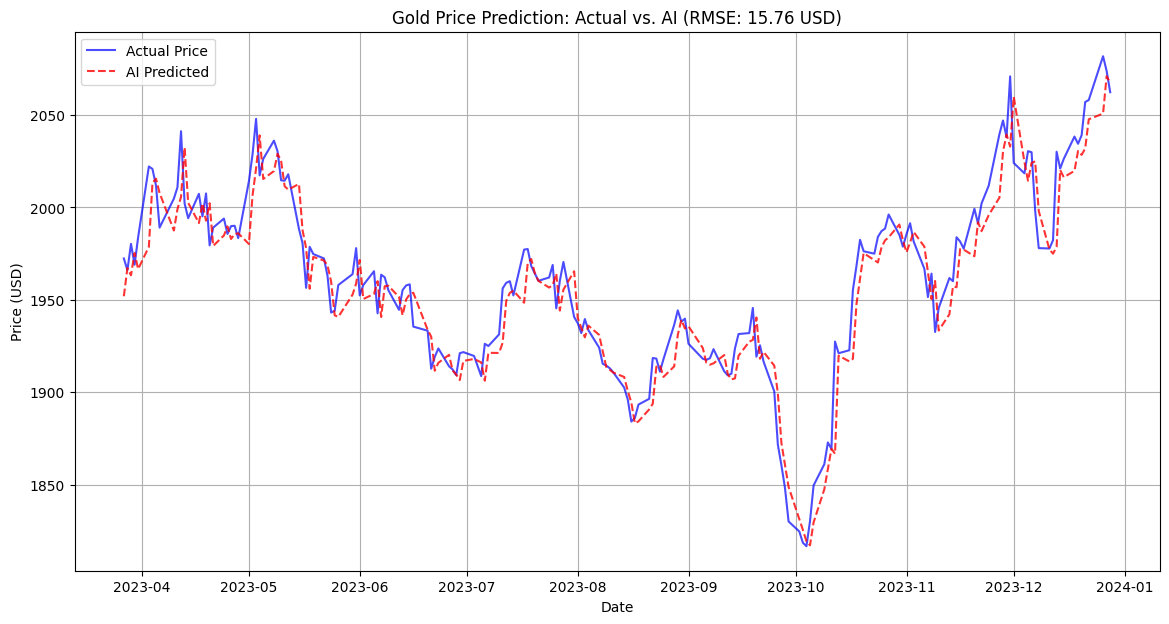

In [34]:
if len(X_test) > 0:
    # Plot actual vs. predicted prices
    plt.figure(figsize=(14, 7))
    plt.plot(df_clean.index[split_index:], y_test, label='Actual Price', color='blue', alpha=0.7)
    plt.plot(df_clean.index[split_index:], predictions, label='AI Predicted', color='red', linestyle='--', alpha=0.8)
    plt.title(f'Gold Price Prediction: Actual vs. AI (RMSE: {rmse:.2f} USD)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("⚠️ No test data available to visualize.")

## สรุปผลการทำนายราคาทองคำ:

### สรุปคำตอบ (Q&A)
โมเดล Linear Regression สำหรับการทำนายราคาทองคำมีค่า Root Mean Squared Error (RMSE) อยู่ที่ **15.76 USD** บนชุดข้อมูลทดสอบ จากการแสดงผลกราฟ พบว่าโมเดลโดยทั่วไปสามารถติดตามแนวโน้มของราคาทองคำได้ค่อนข้างดี แต่มีการคาดการณ์ที่ล่าช้าเล็กน้อย โดยเฉพาะในช่วงที่มีความผันผวนสูง เส้นกราฟที่ทำนายได้จะเรียบกว่าราคาจริง ซึ่งบ่งชี้ว่าโมเดลยังไม่สามารถจับความผันผวนสูงหรือการเปลี่ยนแปลงราคาอย่างกะทันหันได้อย่างสมบูรณ์แบบ

### ผลการวิเคราะห์ข้อมูลที่สำคัญ (Data Analysis Key Findings)
*   โมเดล Linear Regression ทำนายราคาทองคำได้ด้วยค่า Root Mean Squared Error (RMSE) ที่ **15.76 USD** บนชุดข้อมูลทดสอบ
*   โมเดลแสดงความสามารถในการติดตามแนวโน้มทั่วไปได้ดี โดยเคลื่อนไหวไปในทิศทางเดียวกับราคาทองคำจริง
*   การคาดการณ์แสดงให้เห็นถึงความล่าช้าที่สังเกตได้และมีความเรียบเนียนกว่าการเคลื่อนไหวของราคาจริง ซึ่งบ่งชี้ว่าโมเดลมีข้อจำกัดในการตอบสนองต่อการเปลี่ยนแปลงของตลาดอย่างรวดเร็ว
*   โมเดลประสบปัญหาในการจับช่วงเวลาที่มีความผันผวนสูงหรือการเปลี่ยนแปลงราคาอย่างกะทันหันได้อย่างแม่นยำ

### ข้อคิดเห็นหรือขั้นตอนถัดไป (Insights or Next Steps)
*   เพื่อปรับปรุงความแม่นยำในการทำนาย โดยเฉพาะในช่วงเวลาที่มีความผันผวนสูง ควรพิจารณาใช้โมเดลที่ซับซ้อนมากขึ้นนอกเหนือจาก Linear Regression หรือรวมตัวบ่งชี้ตลาดเพิ่มเติมเป็นคุณลักษณะในการวิเคราะห์
*   การวิเคราะห์เพิ่มเติมอาจเน้นไปที่การระบุเงื่อนไขตลาดเฉพาะที่ประสิทธิภาพของโมเดลลดลงอย่างมีนัยสำคัญ เพื่อทำความเข้าใจข้อจำกัดของโมเดลให้ดียิ่งขึ้น